<a href="https://colab.research.google.com/github/riyazroq/Medical-Report-Generation-using-Visual-Language-Models/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. The task includes preprocessing the data with normalization, designing the model architecture with dropout regularization, training the model, and providing a comprehensive performance analysis through accuracy/loss curves, a confusion matrix, and a classification report.

## Environment Setup and Data Preparation

### Subtask:
Import the necessary libraries and load the CIFAR-10 dataset, ensuring the pixel values are normalized for training.


**Reasoning**:
Importing the required libraries and loading the CIFAR-10 dataset is the first step in the data preparation process.



Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)


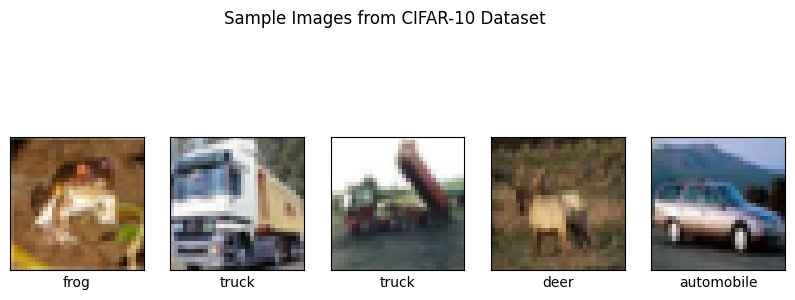

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Verify data shapes
print(f'Training images shape: {train_images.shape}')
print(f'Training labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')

# Class names for CIFAR-10
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Display a few sample images
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle("Sample Images from CIFAR-10 Dataset")
plt.show()

## CNN Model Construction

### Subtask:
Build a robust Convolutional Neural Network architecture with convolutional, pooling, and dense layers, including dropout for regularization.


**Reasoning**:
I will construct the CNN model architecture according to the instructions, including convolutional, pooling, flatten, dense, and dropout layers, and then display the model summary.



In [2]:
model = models.Sequential([
    # Convolutional Base
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Classifier
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Display the model's architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# Task
Build a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. The process involves designing an architecture with multiple convolutional and pooling layers, incorporating dropout regularization to mitigate overfitting, and training the model while tracking accuracy and loss. Finally, perform a comprehensive performance analysis by visualizing accuracy/loss curves and generating a confusion matrix and classification report to evaluate the impact of the dropout regularization.

## CNN Architecture Design

### Subtask:
Define and build the CNN model architecture using Keras Sequential API.


**Reasoning**:
I will construct the CNN model architecture following the specific instructions provided, including convolutional layers, max pooling, flattening, dense layers, and dropout, and then display the model summary.



In [3]:
model = models.Sequential([
    # Conv2D layer with 32 filters and 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Conv2D layer with 64 filters and 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Conv2D layer with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    # Dropout for regularization
    layers.Dropout(0.5),

    # Final Dense layer for 10 classes
    layers.Dense(10)
])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The code produced a warning suggesting the use of an Input layer. I will update the model architecture to use layers.Input for better compatibility with current Keras standards while maintaining the requested structure.



In [4]:
model = models.Sequential([
    # Use Input layer to define input shape
    layers.Input(shape=(32, 32, 3)),

    # Conv2D layer with 32 filters and 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Conv2D layer with 64 filters and 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Conv2D layer with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    # Dropout for regularization
    layers.Dropout(0.5),

    # Final Dense layer for 10 classes
    layers.Dense(10)
])

# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

### Subtask:
Compile the model and train it on the CIFAR-10 dataset while tracking performance metrics.


**Reasoning**:
I will compile the CNN model with the Adam optimizer and SparseCategoricalCrossentropy loss, then train it for 10 epochs using the training and validation data, storing the training history for analysis.



In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

print("Model training completed.")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 46ms/step - accuracy: 0.2708 - loss: 1.9362 - val_accuracy: 0.5039 - val_loss: 1.4029
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 44ms/step - accuracy: 0.4954 - loss: 1.4000 - val_accuracy: 0.5901 - val_loss: 1.1661
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.5622 - loss: 1.2452 - val_accuracy: 0.6339 - val_loss: 1.0407
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6065 - loss: 1.1212 - val_accuracy: 0.6302 - val_loss: 1.0339
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6356 - loss: 1.0466 - val_accuracy: 0.6718 - val_loss: 0.9549
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6645 - loss: 0.9850 - val_accuracy: 0.6687 - val_loss: 0.9319
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.6733 - loss: 0.9380 - val_accuracy: 0.6940 - val_loss: 0.8832
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.6879 -